In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:

y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

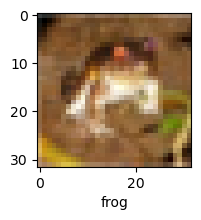

In [16]:
plot_sample(X_train, y_train, 0)

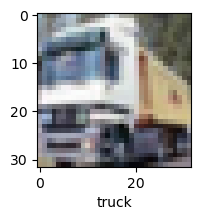

In [17]:
plot_sample(X_train, y_train, 1)

In [19]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.3012 - loss: 1.9358
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4124 - loss: 1.6602
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4481 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4693 - loss: 1.4920
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.4967 - loss: 1.4345


In [32]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.49      0.50      1000
           1       0.34      0.86      0.49      1000
           2       0.37      0.33      0.35      1000
           3       0.39      0.26      0.31      1000
           4       0.53      0.24      0.33      1000
           5       0.52      0.21      0.30      1000
           6       0.40      0.72      0.51      1000
           7       0.70      0.33      0.45      1000
           8       0.55      0.60      0.58      1000
           9       0.48      0.38      0.42      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.42     10000
weighted avg       0.48      0.44      0.42     10000



In [40]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3470 - loss: 1.7497
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5753 - loss: 1.1953
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6372 - loss: 1.0367
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6746 - loss: 0.9340
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7004 - loss: 0.8488
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7236 - loss: 0.7908
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7413 - loss: 0.7441
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7560 - loss: 0.6963
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7670 - loss: 0.6662
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7822 - loss: 0.6169


In [39]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6920 - loss: 0.9322


[0.9371559619903564, 0.6897000074386597]

In [41]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[1.00700499e-03, 7.92503997e-05, 1.33227289e-03, 9.16520536e-01,
        6.44794607e-04, 4.65100929e-02, 1.21221952e-02, 8.49327080e-06,
        2.17710473e-02, 4.31050648e-06],
       [2.40123118e-04, 4.16956618e-02, 2.60188813e-07, 6.69012536e-07,
        1.06136548e-08, 4.89167096e-10, 5.32690425e-09, 1.91609661e-09,
        9.57126200e-01, 9.37028788e-04],
       [3.56206782e-02, 1.82225451e-01, 4.53517103e-04, 3.73472506e-03,
        6.86128566e-04, 1.02513505e-03, 1.03744061e-03, 1.28522748e-04,
        7.74057567e-01, 1.03083043e-03],
       [8.69570196e-01, 9.94201377e-03, 4.17551724e-03, 7.13937450e-03,
        7.26946397e-03, 1.24805578e-04, 1.47586798e-05, 1.43682555e-04,
        1.00889005e-01, 7.31277862e-04],
       [1.98298380e-07, 1.08529792e-04, 7.66725652e-03, 3.45975813e-03,
        9.38470840e-01, 3.99800192e-04, 4.98602986e-02, 3.87764840e-06,
        2.81022421e-05, 1.34727111e-06]], dtype=float32)

In [43]:

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

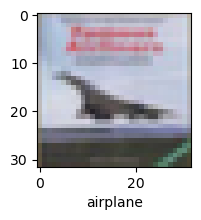

In [45]:
plot_sample(X_test, y_test,3)

In [49]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [51]:
classes[y_classes[3]]

'airplane'

In [2]:
import cv2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The model predicts the image is of a truck
Confidence: 0.67


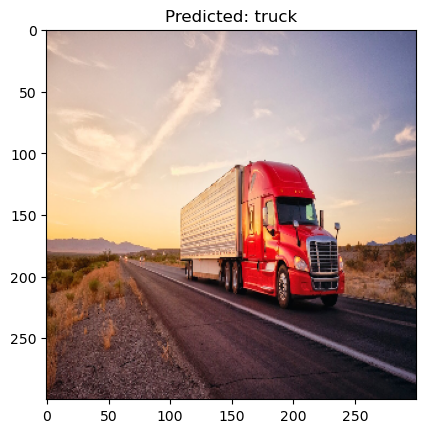

In [74]:


import cv2
import numpy as np

# Load the image
image_path = r"C:\Users\aparu\OneDrive\Desktop\python\MachineLearning\pictures_for_image_processing\truck1.jpg"
image = cv2.imread(image_path)

# Check if image loaded correctly
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Preprocess the image
    def preprocess_image(image):
        # Resize to 32x32 (CIFAR-10 format)
        image_resized = cv2.resize(image, (32, 32))
        # Convert BGR to RGB (CIFAR-10 uses RGB)
        image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        # Normalize pixel values to [0,1] range
        image_normalized = image_rgb / 255.0
        # Add batch dimension
        input_image = np.expand_dims(image_normalized, axis=0)
        return input_image
    input_image = preprocess_image(image)
    prediction = cnn.predict(input_image)
    predicted_class_index = np.argmax(prediction[0])
    
    # Get the class name
    predicted_class = classes[predicted_class_index]
    
    # Print the result
    print(f"The model predicts the image is of a {predicted_class}")
    print(f"Confidence: {prediction[0][predicted_class_index]:.2f}")
    
    # Optional: Display the image
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(cv2.resize(image, (300, 300)), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    
